In [1]:
import pandas as pd
from nltk.corpus import wordnet as wn
import numpy as np

In [2]:
vec_length = 600
epochs = 10

# vecs_df = pd.read_csv("/var/tmp/vectors/1b%sd_vectors_e%s_sample1e4_nonbin" % (vec_length, epochs), 
#                       skiprows=[0], header=None, sep=" ")

vecs_df = pd.read_csv("/var/tmp/xstefan3/vectors/1b600d_vectors_e10_sample1e4_nonbin", 
                      skiprows=[0], header=None, sep=" ")

vecs_df = vecs_df.set_index(0)
vecs_df = vecs_df.drop(columns=[vecs_df.columns[-1]])
vecs_df = vecs_df.replace(vecs_df.values.max(), 1)
vecs_df = vecs_df.replace(vecs_df.values.min(), 0)
# retype to minimal range int to save space
vecs_df = vecs_df.astype('bool')
vecs_df.head(20)

,1,2,3,4,5,6,7,8,9,10,...,591,592,593,594,595,596,597,598,599,600
0,,,,,,,,,,,,,,,,,,,,,
</s>,True,True,False,False,False,True,True,False,False,True,...,True,False,False,False,True,True,False,False,False,False
the,False,False,True,True,False,False,True,False,True,True,...,False,True,True,True,False,True,True,True,False,True
of,False,False,True,False,True,False,False,False,False,False,...,False,True,False,True,True,True,False,True,True,True
and,False,False,True,True,False,True,True,False,False,False,...,False,True,True,True,False,False,True,True,False,True
one,False,False,False,True,False,False,True,False,True,False,...,True,True,False,False,True,False,False,True,False,True
in,False,True,True,True,True,False,True,False,True,False,...,True,True,False,True,True,False,False,True,True,True
a,False,False,False,False,True,False,True,False,True,False,...,False,True,False,False,True,False,False,True,True,True
to,True,False,False,True,False,False,False,False,True,True,...,False,False,True,False,False,True,False,True,True,True
zero,False,False,False,True,False,False,False,False,True,True,...,True,False,False,True,True,False,False,True,False,False


In [3]:
vecs_df.mean(axis=0).sort_values().reset_index()[0].plot(grid=True)

# Implications collection

For each pair of features (x, y), compute a ratio of the pairs of bits (x_i, y_i), where x_i => y_i.

Do this for each mapping in {x<>y, inverse(x)<>y, x<>inverse(y), inverse(x)<>inverse(y)} and select a mapping of x from (x, inverse(x)) so, that a maximum sum of implication probability with other bits is reached.

In [78]:
def feature_dist(x, y):
#     pos_pairs = sum((x & y) | y)
#     all_pairs = len(y)
    return float(sum(x & y) / sum(y)) if sum(y) > 0 else 0

In [79]:
feature_dist(pd.Series([1, 0, 1, 0]), pd.Series([1, 1, 0, 0]))

0.5

In [80]:
def all_combs_dist(x, y):
    return [feature_dist(x, y), feature_dist(~x, y), feature_dist(x, ~y), feature_dist(~x, ~y)]

In [81]:
no_words = int(1e3)
no_features = int(1e2)

widx = np.random.choice(np.arange(len(vecs_df.index)), no_words, replace=False)
fidx = np.random.choice(vecs_df.columns, no_features, replace=False)

dists = vecs_df[fidx].iloc[widx].apply(lambda col1: vecs_df[fidx].iloc[widx]
                                       .apply(lambda col2: all_combs_dist(col1, col2), axis=0), axis=0)

In [344]:
# no_words = int(1e2)
# no_features = int(1e2)

# widx = np.random.choice(np.arange(len(vecs_df.index)), no_words)
# fidx = np.random.choice(np.arange(len(vecs_df.columns)), no_features)

# dists = vecs_df.iloc[widx, fidx].apply(lambda col1: vecs_df.iloc[widx, fidx]
#                                        .apply(lambda col2: all_combs_dist(col1, col2), axis=0), axis=0)

In [7]:
def all_combs_for_one(x_i):
    return vecs_df.iloc[widx, x_i].apply(lambda col1: vecs_df.iloc[widx, fidx]
                                        .apply(lambda col2: all_combs_dist(col1, col2), axis=0)), x_i

In [ ]:
import multiprocessing as mp
from tqdm import tqdm_notebook

pool = mp.Pool(mp.cpu_count())

dists_pool = dict()
for dists_i, x_i in tqdm_notebook(pool.imap_unordered(all_combs_for_one, fidx), total=len(fidx)):
    dists_pool[x_i] = dists_i
    
pool.close()

# dists = pd.DataFrame(dists_pool, index=widx)

In [82]:
max_configs = dists.apply(lambda col: np.array(list(map(np.array, col))).sum(axis=0).argmax(), axis=0)
max_configs = max_configs.reset_index()

In [101]:
dists.applymap(lambda x2: [round(x1, 4) for x1 in x2]).head(8)

,11,364,27,236,283,333,274,273,195,299,...,526,391,335,466,488,557,308,588,462,423
11,"[1.0, 0.0, 0.0, 1.0]","[0.4111, 0.5889, 0.4491, 0.5509]","[0.3489, 0.6511, 0.3673, 0.6327]","[0.5778, 0.4222, 0.5145, 0.4855]","[0.5756, 0.4244, 0.4964, 0.5036]","[0.4556, 0.5444, 0.5236, 0.4764]","[0.4644, 0.5356, 0.4545, 0.5455]","[0.4044, 0.5956, 0.3545, 0.6455]","[0.4733, 0.5267, 0.4782, 0.5218]","[0.5778, 0.4222, 0.5382, 0.4618]",...,"[0.6333, 0.3667, 0.5982, 0.4018]","[0.3778, 0.6222, 0.3709, 0.6291]","[0.3489, 0.6511, 0.3927, 0.6073]","[0.4889, 0.5111, 0.4945, 0.5055]","[0.5956, 0.4044, 0.6018, 0.3982]","[0.5067, 0.4933, 0.5218, 0.4782]","[0.5311, 0.4689, 0.5364, 0.4636]","[0.4867, 0.5133, 0.4909, 0.5091]","[0.4733, 0.5267, 0.4982, 0.5018]","[0.4267, 0.5733, 0.4364, 0.5636]"
364,"[0.4282, 0.5718, 0.4665, 0.5335]","[1.0, 0.0, 0.0, 1.0]","[0.3611, 0.6389, 0.3574, 0.6426]","[0.5116, 0.4884, 0.5669, 0.4331]","[0.4907, 0.5093, 0.5634, 0.4366]","[0.537, 0.463, 0.4595, 0.5405]","[0.456, 0.544, 0.4613, 0.5387]","[0.338, 0.662, 0.4067, 0.5933]","[0.4352, 0.5648, 0.507, 0.493]","[0.5394, 0.4606, 0.5687, 0.4313]",...,"[0.6019, 0.3981, 0.6232, 0.3768]","[0.3958, 0.6042, 0.3574, 0.6426]","[0.4028, 0.5972, 0.3504, 0.6496]","[0.4907, 0.5093, 0.493, 0.507]","[0.6042, 0.3958, 0.5951, 0.4049]","[0.5301, 0.4699, 0.5035, 0.4965]","[0.4977, 0.5023, 0.5616, 0.4384]","[0.5, 0.5, 0.4806, 0.5194]","[0.4745, 0.5255, 0.4965, 0.5035]","[0.4537, 0.5463, 0.4155, 0.5845]"
27,"[0.4373, 0.5627, 0.4571, 0.5429]","[0.4345, 0.5655, 0.4306, 0.5694]","[1.0, 0.0, 0.0, 1.0]","[0.5655, 0.4345, 0.5304, 0.4696]","[0.4903, 0.5097, 0.5554, 0.4446]","[0.5097, 0.4903, 0.4836, 0.5164]","[0.4596, 0.5404, 0.4587, 0.5413]","[0.39, 0.61, 0.3697, 0.6303]","[0.4875, 0.5125, 0.4696, 0.5304]","[0.5627, 0.4373, 0.5523, 0.4477]",...,"[0.5989, 0.4011, 0.6225, 0.3775]","[0.3983, 0.6017, 0.3604, 0.6396]","[0.3649, 0.6351, 0.3775, 0.6225]","[0.4958, 0.5042, 0.4899, 0.5101]","[0.5515, 0.4485, 0.6256, 0.3744]","[0.546, 0.454, 0.4977, 0.5023]","[0.4958, 0.5042, 0.5554, 0.4446]","[0.5125, 0.4875, 0.4758, 0.5242]","[0.4986, 0.5014, 0.4805, 0.5195]","[0.4123, 0.5877, 0.4431, 0.5569]"
236,"[0.4788, 0.5212, 0.4158, 0.5842]","[0.407, 0.593, 0.4617, 0.5383]","[0.3738, 0.6262, 0.3414, 0.6586]","[1.0, 0.0, 0.0, 1.0]","[0.5488, 0.4512, 0.512, 0.488]","[0.4862, 0.5138, 0.5011, 0.4989]","[0.4622, 0.5378, 0.4551, 0.5449]","[0.3591, 0.6409, 0.3982, 0.6018]","[0.512, 0.488, 0.4333, 0.5667]","[0.5322, 0.4678, 0.5842, 0.4158]",...,"[0.5912, 0.4088, 0.6411, 0.3589]","[0.3702, 0.6298, 0.3786, 0.6214]","[0.3481, 0.6519, 0.4026, 0.5974]","[0.4991, 0.5009, 0.4836, 0.5164]","[0.5893, 0.4107, 0.6105, 0.3895]","[0.5322, 0.4678, 0.4945, 0.5055]","[0.5783, 0.4217, 0.4814, 0.5186]","[0.5083, 0.4917, 0.4661, 0.5339]","[0.4862, 0.5138, 0.488, 0.512]","[0.4273, 0.5727, 0.4376, 0.5624]"
283,"[0.4868, 0.5132, 0.4081, 0.5919]","[0.3985, 0.6015, 0.4701, 0.5299]","[0.3308, 0.6692, 0.391, 0.609]","[0.5602, 0.4398, 0.5235, 0.4765]","[1.0, 0.0, 0.0, 1.0]","[0.4793, 0.5207, 0.5085, 0.4915]","[0.4605, 0.5395, 0.4573, 0.5427]","[0.3778, 0.6222, 0.3761, 0.6239]","[0.4586, 0.5414, 0.4957, 0.5043]","[0.5489, 0.4511, 0.5641, 0.4359]",...,"[0.6147, 0.3853, 0.6132, 0.3868]","[0.3383, 0.6617, 0.4145, 0.5855]","[0.3684, 0.6316, 0.3782, 0.6218]","[0.5188, 0.4812, 0.4615, 0.5385]","[0.5695, 0.4305, 0.6325, 0.3675]","[0.4925, 0.5075, 0.5406, 0.4594]","[0.5545, 0.4455, 0.5107, 0.4893]","[0.485, 0.515, 0.4936, 0.5064]","[0.4267, 0.5733, 0.5556, 0.4444]","[0.4323, 0.5677, 0.4316, 0.5684]"
333,"[0.4158, 0.5842, 0.4832, 0.5168]","[0.4706, 0.5294, 0.3945, 0.6055]","[0.3712, 0.6288, 0.3471, 0.6529]","[0.5355, 0.4645, 0.5503, 0.4497]","[0.5172, 0.4828, 0.5464, 0.4536]","[1.0, 0.0, 0.0, 1.0]","[0.4645, 0.5355, 0.4536, 0.5464]","[0.3408, 0.6592, 0.4122, 0.5878]","[0.4949, 0.5051, 0.4576, 0.5424]","[0.5822, 0.4178, 0.5306, 0.4694]",...,"[0.6166, 0.3834, 0.6114, 0.3886]","[0.3813, 0.6187, 0.3669, 0.6331]","[0.3793, 0.6207, 0.3669, 0.6331]","[0.5375, 0.4625, 0.44

In [85]:
max_distances = max_configs.apply(lambda row: dists.loc[row["index"]].apply(lambda y_row: y_row[row[0]]), axis=1)

In [86]:
from scipy.sparse.csgraph import minimum_spanning_tree

max_distances_inv = max_distances.applymap(lambda x: 1-x)
s_tree = minimum_spanning_tree(max_distances_inv).todense()
s_tree[s_tree != 0]

matrix([[0.25090909, 0.24823944, 0.22932917, 0.1878453 , 0.19172932,
         0.22287968, 0.25693161, 0.24398074, 0.23664122, 0.20143885,
         0.18540434, 0.19894366, 0.2532833 , 0.26078431, 0.24098124,
         0.17017544, 0.19360568, 0.25846702, 0.25825243, 0.26915521,
         0.26199262, 0.26138614, 0.18548387, 0.26717557, 0.24542125,
         0.19928187, 0.18011257, 0.19930676, 0.26024955, 0.20450886,
         0.18928571, 0.218     , 0.2581262 , 0.23132969, 0.24448217,
         0.1835206 , 0.18120805, 0.28315412, 0.26315789, 0.23745819,
         0.28832117, 0.17614679, 0.19888476, 0.25092937, 0.2556391 ,
         0.45540797, 0.20113852, 0.20582524, 0.19075145, 0.26534653,
         0.19338843, 0.18808777, 0.25714286, 0.264     , 0.25270758,
         0.23809524, 0.2037037 , 0.2       , 0.2627451 , 0.23765996,
         0.25239006, 0.28378378, 0.18139535, 0.2074883 , 0.2228361 ,
         0.25794393, 0.26736111, 0.27289377, 0.27522936, 0.26398601,
         0.27090909, 0.26346154, 0

In [87]:
max_distances.index[np.argwhere(s_tree != 0)]

Int64Index([ [0, 74],  [1, 74],  [2, 74],  [3, 42],  [4, 42],  [5, 74],
             [6, 74],  [7, 74],  [8, 74],  [9, 42], [10, 42], [11, 42],
            [12, 74], [13, 74], [14, 74], [15, 42], [16, 42], [17, 74],
            [18, 74], [19, 74], [20, 74], [21, 74], [22, 42], [23, 74],
            [24, 74], [25, 42], [26, 42], [27, 42], [28, 74], [29, 42],
            [30, 42], [31, 42], [32, 74], [33, 74], [34, 74], [35, 42],
            [36, 42], [37, 74], [38, 74], [39, 74], [40, 74], [41, 42],
            [43, 42], [44, 74], [45, 74], [46, 21], [46, 42], [47, 74],
            [48, 42], [49, 14], [50, 42], [51, 42], [52, 74], [53, 74],
            [54, 74], [55, 74], [56, 42], [57, 42], [58, 74], [59, 74],
            [60, 74], [61, 74], [62, 42], [63, 42], [64, 42], [65, 74],
            [66, 74], [67, 74], [68, 14], [69, 74], [70, 74], [71, 74],
            [72, 74], [73, 74], [75, 42], [76, 74], [77, 42], [78, 42],
            [79, 42], [80, 42], [81, 74], [82, 74], [83, 42], [8

In [95]:
import networkx as nx
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams['figure.figsize'] = 14, 14

G = nx.DiGraph()
edge_labels = dict()
for x_i, y_i in np.argwhere(s_tree != 0):
    val = max_distances.iloc[x_i, y_i]
    G.add_edge(x_i, y_i, weight=round(val, 3))
    edge_labels[(x_i, y_i)] = round(val, 3)

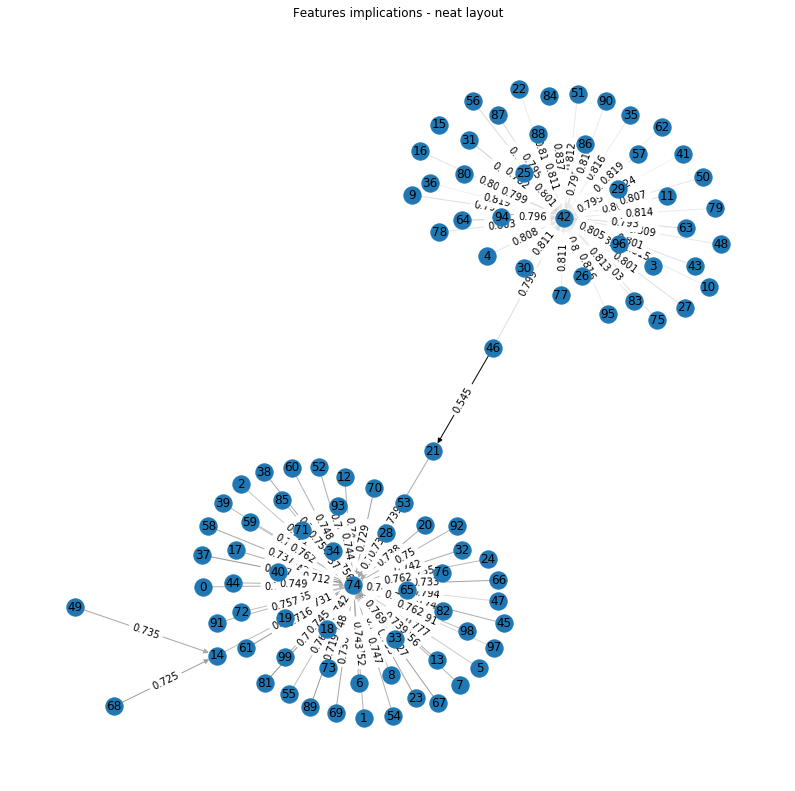

In [96]:
plt.title('Features implications - neat layout')

pos = nx.drawing.nx_agraph.graphviz_layout(G, prog='neato')

nx.draw(G, pos, edge_color = [ i[2]['weight'] for i in G.edges(data=True) ], edge_cmap=plt.cm.gray, 
        arrows=True, with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.5)

pos = nx.get_node_attributes(G,'pos')

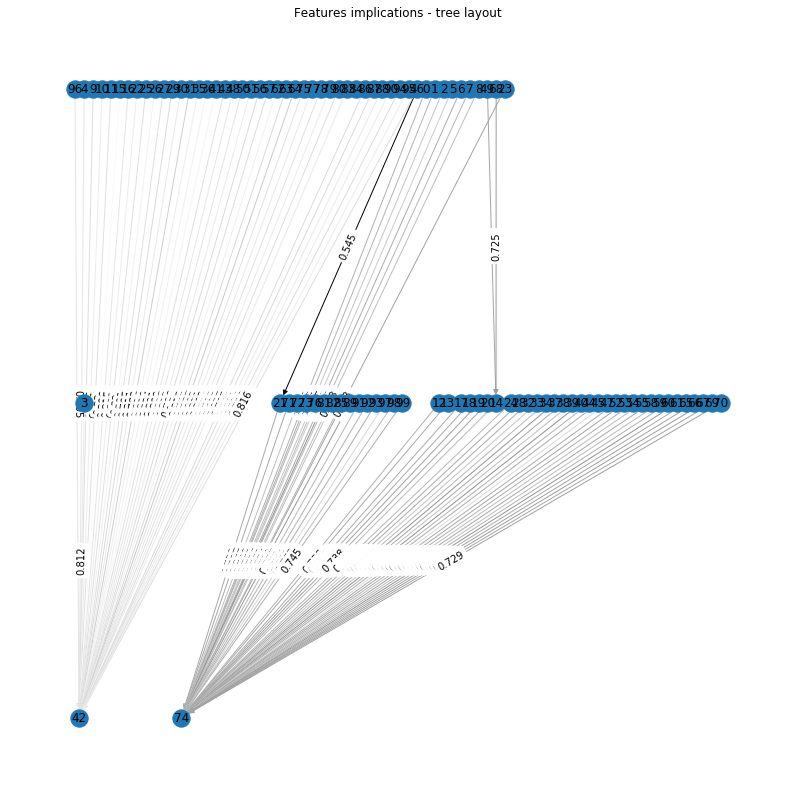

In [97]:
plt.title('Features implications - tree layout')

pos = nx.drawing.nx_agraph.graphviz_layout(G, prog='dot')

nx.draw(G, pos, edge_color = [ i[2]['weight'] for i in G.edges(data=True) ], edge_cmap=plt.cm.gray, 
        arrows=True, with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.5)

pos = nx.get_node_attributes(G,'pos')